# Iman Noor
---

# **Regression Models using scikit-learn**

- Regression models in `scikit-learn` are used to predict continuous `outcomes` based on input features. 
- Scikit-learn provides a simple and efficient way to implement these models with methods for `fitting`, `predicting` and `evaluating` the model performance. 
- **Key features** include handling `missing values`, `feature scaling` and `model validation` through techniques like `cross-validation`. 
- These models are widely used in various fields such as finance, healthcare, and engineering for tasks like forecasting, risk assessment, and trend analysis.
- These models:
    - **Gradient Boosting Regression**
    - **Elastic Net Regression**
    - **Bayesian Ridge Regression**
    - **Stochastic Gradient Descent Regression**
    - **Support Vector Machine Regression**
    - **Lasso Regression**
    - **Ensemble Regressors (Random Forest)**

## **Data Preparation**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

### Loading the dataset

In [2]:
boston = load_boston()
X, y = boston.data, boston.target
X_df = pd.DataFrame(X, columns=boston.feature_names)
y_df = pd.DataFrame(y, columns=['MEDV'])

In [3]:
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y_df.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Splitting the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(404, 13)

### Data Transformation

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

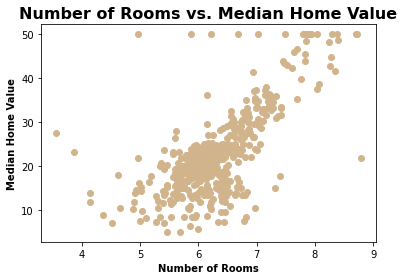

In [8]:
plt.scatter(X_df['RM'], y_df, color='tan')
plt.title('Number of Rooms vs. Median Home Value', weight='bold', fontsize=16)
plt.xlabel('Number of Rooms', weight='bold')
plt.ylabel('Median Home Value', weight='bold')
plt.show()

---
## **1. Gradient Boosting Regression**

Gradient Boosting Regression is an ensemble technique that builds models sequentially. Each new model attempts to correct the errors made by the previous ones, making it effective for complex datasets.

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

### Training the model

In [10]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Predictions

In [11]:
y_pred_gbr = gbr_model.predict(X_test)
y_pred_gbr

array([23.4497613 , 31.46136029, 17.70531345, 24.02257316, 17.6811439 ,
       22.03112796, 18.14958762, 13.83045241, 20.61619342, 21.04285745,
       19.93787694, 17.84771967,  9.00542602, 21.75820976, 19.79454516,
       25.71887535, 20.04177142,  8.83726437, 45.07118382, 15.96280089,
       24.1976327 , 25.26461031, 12.51887607, 20.89492763, 14.97826629,
       15.47812803, 22.20367497, 13.26656609, 19.27766026, 21.43650957,
       19.72895052, 23.47588201, 19.38092692, 19.15659237, 14.50437732,
       16.94131142, 33.09630021, 19.80432738, 20.7291071 , 24.14928838,
       18.30166138, 30.36297218, 44.94906542, 20.84894217, 22.61816613,
       14.61317262, 15.71182991, 24.14928838, 18.06929082, 28.08800612,
       20.23520559, 35.66832821, 16.73377496, 24.99108092, 47.7594972 ,
       21.39870322, 16.51753536, 32.24969813, 22.03440415, 18.08425056,
       24.24590305, 34.58456084, 30.66211615, 19.1946555 , 24.57888732,
       16.92131694, 14.50851517, 23.66112578, 28.04012929, 15.40

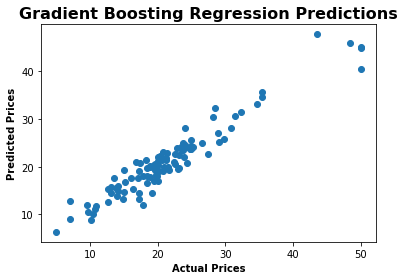

In [12]:
plt.scatter(y_test, y_pred_gbr)
plt.xlabel('Actual Prices', weight='bold')
plt.ylabel('Predicted Prices', weight='bold')
plt.title('Gradient Boosting Regression Predictions', weight='bold', fontsize=16)
plt.show()

---
## **2. Elastic Net Regression**

Elastic Net Regression is a linear regression model that combines both `L1 (Lasso)` and `L2 (Ridge)` regularization techniques to prevent overfitting.

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

### Training the model

In [14]:
e_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
e_net_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [15]:
print(e_net_model.coef_)

[-0.40827814  0.         -0.18409588  0.46384093 -0.2232498   2.55110853
 -0.         -0.         -0.         -0.33558655 -1.22110389  0.60097788
 -2.35523182]


In [16]:
print(e_net_model.intercept_)

22.796534653465372


### Predictions

In [17]:
y_pred_en = e_net_model.predict(X_test)
y_pred_en

array([26.0158402 , 30.47521484, 17.84552955, 24.44834729, 19.07513852,
       22.95253295, 19.86088825, 16.57008857, 20.74903482, 20.95236696,
       23.0130392 , 22.4070053 ,  2.35175866, 22.74640243, 20.84949518,
       23.5347415 , 19.27856226,  9.06488884, 34.82996988, 18.26904579,
       25.26068852, 26.4696591 , 16.10910164, 23.72489111, 18.02175897,
       15.5490468 , 22.5942395 , 17.45887384, 22.22926194, 20.18773904,
       21.11034892, 24.98350571, 23.49193444, 17.98542272, 16.595655  ,
       19.98458649, 29.87951019, 21.93697511, 23.3926826 , 24.33140802,
       16.39741158, 27.37108029, 35.25776365, 20.49735179, 25.52724051,
       17.02544196, 17.46524345, 25.27066283, 19.29643983, 28.65442423,
       23.76460768, 30.70112201, 19.17713507, 25.10742485, 33.62415094,
       21.68319426, 19.0116761 , 28.36428796, 24.89822921, 18.58681928,
       25.51097032, 30.13149887, 27.63366117, 18.34946333, 26.70415547,
       18.09320312, 19.66756429, 25.2381753 , 27.57100988, 14.90

In [18]:
mse = mean_squared_error(y_test, y_pred_en)
mae = mean_absolute_error(y_test, y_pred_en)
r2 = r2_score(y_test, y_pred_en)

print(f"Elastic Net Regressor Mean Squared Error: {mse}")
print(f"Elastic Net Regressor Mean Absolute Error: {mae}")
print(f"Elastic Net Regressor R² Score: {r2}")

Elastic Net Regressor Mean Squared Error: 28.358648122255964
Elastic Net Regressor Mean Absolute Error: 3.4310018130449818
Elastic Net Regressor R² Score: 0.6132935340284021


### Hyperparameter tuning with GridSearchCV

In [19]:
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [20]:
elastic_net_cv = GridSearchCV(ElasticNet(), param_grid, cv=3, n_jobs=-1)
elastic_net_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [21]:
elastic_net_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

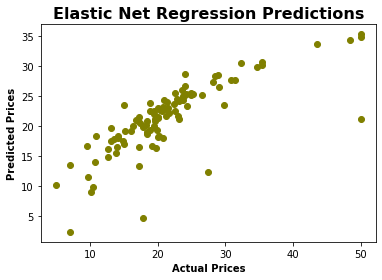

In [22]:
plt.scatter(y_test, y_pred_en, color='olive')
plt.xlabel('Actual Prices', weight='bold')
plt.ylabel('Predicted Prices', weight='bold')
plt.title('Elastic Net Regression Predictions', weight='bold', fontsize=16)
plt.show()

---
## **3. Bayesian Ridge Regression**

Bayesian Ridge Regression applies Bayesian principles to linear regression, providing a probabilistic approach to regression.

In [23]:
from sklearn.linear_model import BayesianRidge

### Training the model

In [24]:
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, y_train)

BayesianRidge()

### Predictions

In [25]:
y_pred_br = bayesian_ridge_model.predict(X_test)
y_pred_br

array([28.86103438, 35.74797256, 15.38416904, 24.97297845, 18.74388114,
       23.27641787, 17.77628339, 14.53433101, 22.73784633, 20.74240974,
       24.7610732 , 18.83981081, -5.80625797, 21.87592846, 19.26930498,
       26.01427823, 20.17888797,  5.80394391, 40.1773627 , 17.60245911,
       27.04662778, 29.74725858, 11.6140355 , 24.21170457, 17.7872312 ,
       15.62098894, 22.80456876, 14.67863826, 22.45360098, 19.33391915,
       22.31360308, 25.22001618, 25.83800821, 17.61490579, 16.60266655,
       17.19942936, 31.24212477, 20.15657908, 23.80394052, 24.60409813,
       14.12382074, 31.81579664, 42.13434337, 17.54394947, 27.27818501,
       16.88823776, 14.25675842, 25.87255688, 20.11795411, 30.07676546,
       21.4151839 , 34.0673545 , 16.26984506, 26.33503187, 39.27873944,
       22.45106491, 18.81416955, 32.30784075, 25.08388539, 13.12374614,
       22.78981359, 30.34008708, 31.28498834, 16.03172365, 20.82515846,
       16.75985363, 20.43190593, 25.90448653, 30.34803121, 11.65

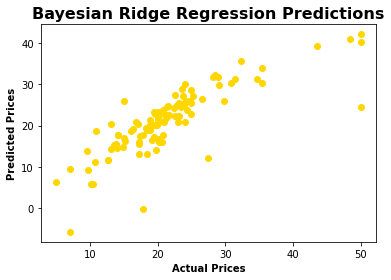

In [26]:
plt.scatter(y_test, y_pred_br, color='gold')
plt.xlabel('Actual Prices', weight='bold')
plt.ylabel('Predicted Prices', weight='bold')
plt.title('Bayesian Ridge Regression Predictions', weight='bold', fontsize=16)
plt.show()

---
## **4. Stochastic Gradient Descent Regression**

Stochastic Gradient Descent (SGD) Regression is an optimization algorithm that updates model parameters iteratively to minimize the loss function.

**Why:** Efficient for large datasets

**When:** Use when the sample size is large (>100,000)

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

### Training the model

In [28]:
sgd_model = SGDRegressor(max_iter=100, tol=1e-3)
sgd_model.fit(X_train, y_train)

SGDRegressor(max_iter=100)

### Predictions

In [29]:
y_pred_sgd = sgd_model.predict(X_test)
y_pred_sgd

array([28.92796722, 35.72710469, 16.01098054, 25.00988334, 18.70049705,
       23.3989628 , 17.71974547, 14.58151657, 22.68248891, 20.86564861,
       24.56824134, 18.76381425, -5.99167192, 22.00665221, 19.20279688,
       26.03782204, 19.6437418 ,  5.61852248, 40.17630513, 17.56125689,
       26.95135995, 29.64300468, 11.55165686, 24.27628076, 17.73069584,
       15.49952092, 22.94647224, 14.59476891, 22.35843439, 19.44987705,
       22.29321911, 25.23755179, 25.92427587, 17.56327975, 16.47800978,
       17.20541321, 31.32597802, 20.01854722, 23.74720805, 24.63756884,
       14.1704919 , 31.61187231, 41.98990903, 17.63768104, 27.42156807,
       16.81511959, 14.22003878, 25.92195245, 20.05163803, 30.33564528,
       21.36726781, 33.97118074, 16.26605905, 26.58218981, 39.34198649,
       22.44309674, 18.77531293, 32.15063553, 25.10949718, 12.99163878,
       22.65749998, 30.14821088, 31.29574225, 16.0407193 , 21.13396342,
       16.58896454, 20.40727921, 25.92098194, 30.27834358, 11.50

### Evaluation

In [30]:
mse = mean_squared_error(y_test, y_pred_sgd)
print(f'SGD Regressor Mean Squared Error: {mse}')

SGD Regressor Mean Squared Error: 24.814295298429094


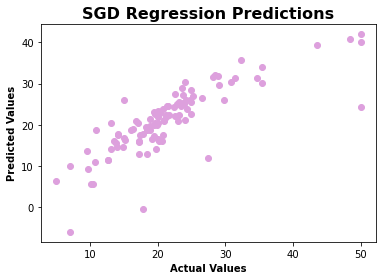

In [31]:
plt.scatter(y_test, y_pred_sgd, color='plum')
plt.xlabel('Actual Values', weight='bold')
plt.ylabel('Predicted Values', weight='bold')
plt.title('SGD Regression Predictions', weight='bold', fontsize=16)
plt.show()

---
## **5. Support Vector Machine Regression**

Support Vector Machine (SVM) Regression is a type of Support Vector Machine that predicts continuous values rather than classifications.

In [32]:
from sklearn.svm import SVR

### Training the model

In [33]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

### Predictions

In [34]:
y_pred_svr = svm_model.predict(X_test)
y_pred_svr

array([26.31016269, 32.69170486, 15.91777924, 24.25889284, 18.01277575,
       21.95636273, 17.83715704, 16.67985915, 19.77567968, 20.05298134,
       22.00156037, 18.58864783, -5.94435477, 21.55473462, 17.67402875,
       25.05533452, 19.54979435,  5.36140425, 39.99100939, 16.64908024,
       26.57404564, 28.78828667, 12.47209881, 24.33625151, 15.91937961,
       12.62941555, 21.60003989, 14.2719373 , 19.9719371 , 18.65560292,
       19.64647466, 24.30776658, 24.85375114, 14.06911376, 15.25180534,
       16.84230319, 30.3718119 , 19.58483561, 22.02208796, 24.65376679,
       14.35963415, 29.84449113, 41.97596354, 17.29007769, 25.79103664,
       14.84769623, 13.94697892, 25.98907779, 18.41609788, 28.37300997,
       20.28649792, 32.65317146, 16.93060231, 25.54889315, 37.79332406,
       20.98600147, 17.65782583, 31.48519718, 24.51523846, 13.30094553,
       23.58320389, 31.26510142, 29.66617878, 15.57354324, 21.60841071,
       14.4489115 , 19.3432967 , 25.0905891 , 29.72543206, 10.43

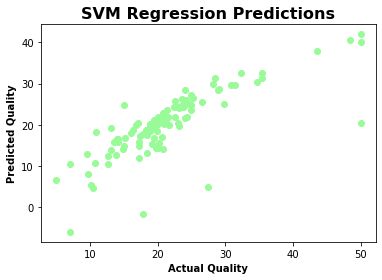

In [35]:
plt.scatter(y_test, y_pred_svr, color='palegreen')
plt.xlabel('Actual Quality', weight='bold')
plt.ylabel('Predicted Quality', weight='bold')
plt.title('SVM Regression Predictions', weight='bold', fontsize=16)
plt.show()

---
## **6. Lasso Regression**

Lasso (Least Absolute Shrinkage and Selection Operator) Regression

**Why:** Performs feature selection

**When:** Use when you expect only a few features to be significant

In [36]:
from sklearn.linear_model import Lasso

### Training the model

In [37]:
lasso = Lasso(max_iter=1000)
lasso.fit(X_train, y_train)

Lasso()

### Predictions

In [38]:
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([25.98607901, 29.69947724, 17.86451976, 24.68564266, 19.52303372,
       22.73829033, 18.37606023, 15.18540808, 21.37141046, 20.36087397,
       20.00834578, 21.087778  ,  0.90763235, 22.42082697, 19.9581115 ,
       25.10816047, 18.14124221,  6.94444465, 36.41353681, 18.6795378 ,
       25.29589486, 26.6109486 , 13.89488981, 24.02519829, 18.68190255,
       15.16431497, 22.45295718, 18.8441478 , 19.13179791, 19.45755305,
       19.63846679, 25.26571644, 25.79741229, 18.80668172, 16.0559808 ,
       20.08644064, 31.03903052, 21.27986441, 20.76613814, 24.43974869,
       14.35442688, 27.60552111, 36.96468782, 19.23331116, 25.42532989,
       17.10436663, 15.85657302, 25.60956041, 19.48313703, 29.3275448 ,
       22.98075185, 31.41733989, 17.78465784, 25.86562078, 35.31088786,
       22.78846377, 19.55869491, 29.21587814, 24.5577775 , 16.57984857,
       25.57110583, 30.9067251 , 28.57377681, 17.61572343, 27.32840116,
       13.70501065, 20.37937635, 25.28431528, 28.07653111, 15.45

### Evaluation

In [39]:
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regressor Mean Squared Error: {mse}')
print(f'Lasso Regressor Mean Absolute Error: {mae}')
print(f'Lasso Regressor R² Score: {r2}')

Lasso Regressor Mean Squared Error: 27.57769177613475
Lasso Regressor Mean Absolute Error: 3.473770443541664
Lasso Regressor R² Score: 0.6239428734251422


### Hyperparameter tuning with GridSearchCV

In [40]:
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [1000, 10000, 100000, 1000000, 10000000]
}

In [41]:
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=3, n_jobs=-1)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000],
                         'max_iter': [1000, 10000, 100000, 1000000, 10000000],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                 1000]})

In [42]:
print(f'Best Lasso Parameters: {lasso_cv.best_params_}')

Best Lasso Parameters: {'alpha': 0.01, 'max_iter': 1000, 'tol': 1e-05}


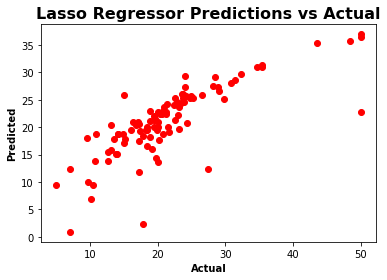

In [43]:
plt.scatter(y_test, y_pred_lasso, color='red')
plt.title('Lasso Regressor Predictions vs Actual', weight='bold', fontsize=16)
plt.xlabel('Actual', weight='bold')
plt.ylabel('Predicted', weight='bold')
plt.show()

---
## **7. Ensemble Regressors (Random Forest)**

**Why:** Reduces overfitting and handles complex patterns

**When:** Use when dealing with medium to large datasets

In [44]:
from sklearn.ensemble import RandomForestRegressor

### Training the model

In [45]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

### Prediction

In [46]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([22.1528245 , 29.52355481, 17.49038457, 22.79382689, 15.75131166,
       21.62587976, 18.75765425, 15.66784332, 21.21654351, 20.84078975,
       19.16044678, 18.99683884,  8.93976573, 21.62760097, 20.87260262,
       26.30164567, 18.63112178,  9.56825315, 45.16978559, 14.64494183,
       23.54404276, 23.110891  , 15.32879465, 23.58115847, 15.24598731,
       15.62960653, 21.36764092, 14.30612227, 18.75189085, 20.98562313,
       19.89860389, 23.07663019, 29.41086095, 20.68458235, 15.01753968,
       15.97157317, 34.88602407, 20.91347364, 20.16500746, 22.93184569,
       18.74130904, 29.22355594, 45.25558946, 20.88922756, 22.28058626,
       14.27233567, 16.29465367, 23.08506094, 17.4682914 , 27.23339377,
       20.96958876, 32.81167076, 16.7541871 , 25.93865477, 45.42984668,
       21.26255536, 15.40200178, 31.17325756, 22.10496091, 19.88867637,
       25.51640422, 34.05690169, 28.41448598, 20.16383965, 26.67388716,
       17.98098879, 13.75785681, 23.06056968, 27.50642177, 15.35

### Evaluation

In [47]:
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor Mean Squared Error: {mse}')
print(f'Random Forest Regressor Mean Absolute Error: {mae}')
print(f'Random Forest Regressor R² Score: {r2}')

Random Forest Regressor Mean Squared Error: 9.173763031219103
Random Forest Regressor Mean Absolute Error: 2.2007378477130883
Random Forest Regressor R² Score: 0.8749039987318895


### Hyperparameter tuning with GridSearchCV

In [48]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
rf_cv = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, n_jobs=-1)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [50]:
print(f'Best Random Forest Parameters: {rf_cv.best_params_}')

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


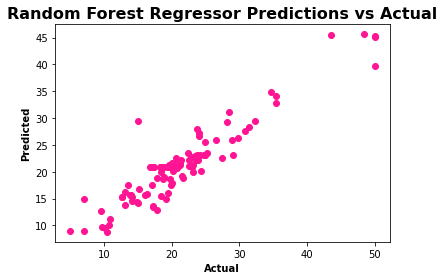

In [51]:
plt.scatter(y_test, y_pred_rf, color='deeppink')
plt.title('Random Forest Regressor Predictions vs Actual', weight='bold', fontsize=16)
plt.xlabel('Actual', weight='bold')
plt.ylabel('Predicted', weight='bold')
plt.show()

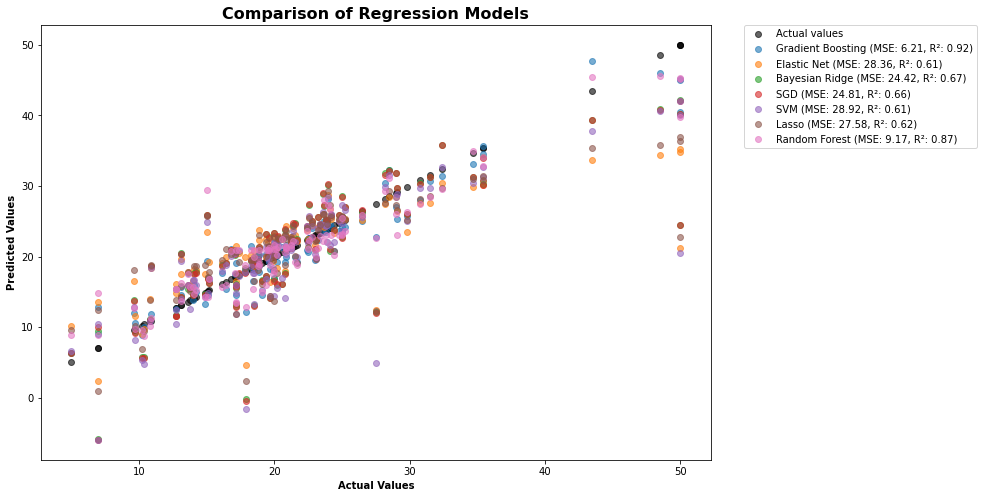

In [52]:
# Function to plot predictions
def plot_model_predictions(y_test, predictions, labels):
    plt.figure(figsize=(12, 8))
    
    # Plot the actual values
    plt.scatter(y_test, y_test, color='black', label='Actual values', alpha=0.6)
    
    # Plot each model's predictions
    for y_pred, label in zip(predictions, labels):
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        plt.scatter(y_test, y_pred, label=f'{label} (MSE: {mse:.2f}, R²: {r2:.2f})', alpha=0.6)
    
    plt.xlabel('Actual Values', weight='bold')
    plt.ylabel('Predicted Values', weight='bold')
    plt.title('Comparison of Regression Models', weight='bold', fontsize=16)
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.show()

predictions = [y_pred_gbr, y_pred_en, y_pred_br, y_pred_sgd, y_pred_svr, y_pred_lasso, y_pred_rf]
labels = ['Gradient Boosting', 'Elastic Net', 'Bayesian Ridge', 'SGD', 'SVM', 'Lasso', 'Random Forest']
plot_model_predictions(y_test, predictions, labels)

# **The End :)**